<a href="https://colab.research.google.com/github/nisha1365/precisionFDA/blob/main/ed_visit_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Listing all the features of "ED Visits" files.**

ED - A hospital emergency department visit is a direct personal exchange between a patient and either a physician or a health care provider working under the physician's supervision, for the purpose of seeking care and receiving personal health services.
Internalpatientid - Unique id of the patients.

Age at ed visit - Age of the patient at the ed(Emergency department) visit.

Ed visit start date - Patient visiting the Emergency department(time is recorded).

Discharge date ed - Patient getting discharged from the emergency department.(time is recorded).

Died during ed visit - Patient died during the ED visit .

First listed diagnosis icd10 subcategory - The category describes the general type of the injury or disease at first

Second listed diagnosis icd10 subcategory - The category describes the general type of the injury or disease in the second list.

State - Name of the states.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ed_visit = pd.read_csv('/content/ed_visits_train.csv')
ed_visit.head()

,Unnamed: 0,Internalpatientid,Age at ed visit,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
0,0,101689,64.361251,2021-08-26 00:53:30.0,2021-08-26 04:24:27.0,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia
1,3,107210,71.317300,2022-05-18 11:21:28.0,2022-05-18 18:30:21.0,No,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia
2,4,107866,61.164579,2017-06-26 15:41:11.0,2017-06-26 23:33:50.0,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania
3,5,107906,66.101996,2017-02-17 06:42:34.0,2017-02-17 08:08:28.0,No,Dysuria,"Chronic kidney disease, unspecified",New York
4,6,108522,73.598130,2018-09-30 02:47:49.0,2018-09-30 04:28:57.0,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois


In [3]:
ed_visit.drop(['Unnamed: 0','Ed visit start date','Discharge date ed'], axis = 1,inplace = True)


In [4]:
ed_visit.head()

,Internalpatientid,Age at ed visit,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
0,101689,64.361251,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia
1,107210,71.317300,No,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia
2,107866,61.164579,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania
3,107906,66.101996,No,Dysuria,"Chronic kidney disease, unspecified",New York
4,108522,73.598130,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois


In [5]:
ed_visit.shape

(549857, 6)

In [6]:
ed_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549857 entries, 0 to 549856
Data columns (total 6 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Internalpatientid                          549857 non-null  int64  
 1   Age at ed visit                            549857 non-null  float64
 2   Died during ed visit                       549857 non-null  object 
 3   First listed diagnosis icd10 subcategory   549857 non-null  object 
 4   Second listed diagnosis icd10 subcategory  549857 non-null  object 
 5   State                                      549857 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 25.2+ MB


In [7]:
duplicate = ed_visit.duplicated('Internalpatientid')

In [8]:
if duplicate.any():
  print("Duplicates found in the 'Internalpatientid' column")
else:
  print("No Duplicates found in the 'Internalpatientid' column")

Duplicates found in the 'Internalpatientid' column


In [9]:
duplicate.sum()

491617

In [10]:

print(ed_visit['Age at ed visit'].max())
print(ed_visit['Age at ed visit'].min())
print(ed_visit['Age at ed visit'].mean())

108.576240500076
18.342004547296952
70.03421614361285


# Univariate Analysis

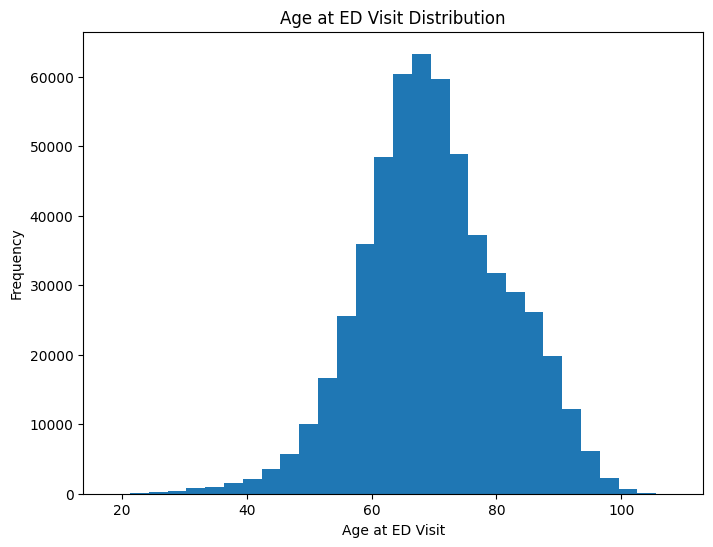

In [11]:
# Plot the distribution of age at ed visit

plt.figure(figsize=(8,6))
plt.hist(ed_visit['Age at ed visit'], bins = 30)
plt.xlabel('Age at ED Visit')
plt.ylabel('Frequency')
plt.title('Age at ED Visit Distribution')
plt.show()

In [12]:
ed_visit['First listed diagnosis icd10 subcategory'].nunique()

3645

In [13]:
ed_visit['Second listed diagnosis icd10 subcategory'].nunique()

3060

In [14]:
ed_visit['Died during ed visit'].value_counts()

No     549746
Yes       111
Name: Died during ed visit, dtype: int64

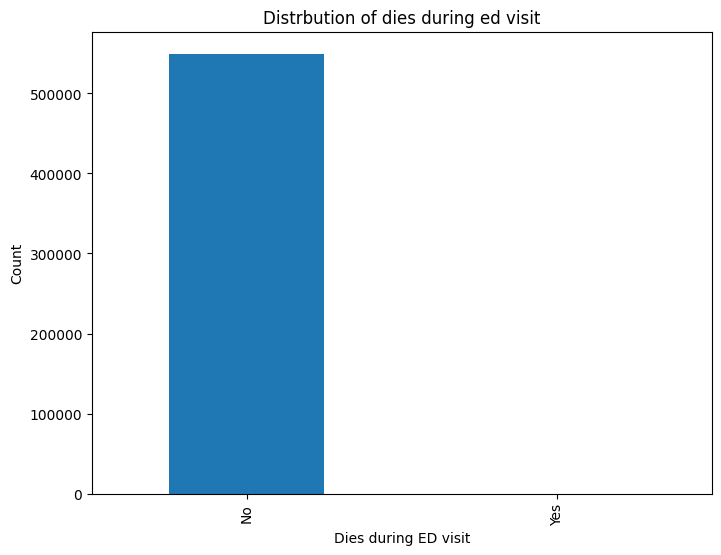

In [15]:
# Analyze the distrbution of died during ed visit

dies_during_visit_counts = ed_visit['Died during ed visit'].value_counts()

#Plot the distrbution of dies during ed visit

plt.figure(figsize=(8,6))
dies_during_visit_counts.plot(kind='bar')
plt.xlabel('Dies during ED visit')
plt.ylabel('Count')
plt.title('Distrbution of dies during ed visit')
plt.show()


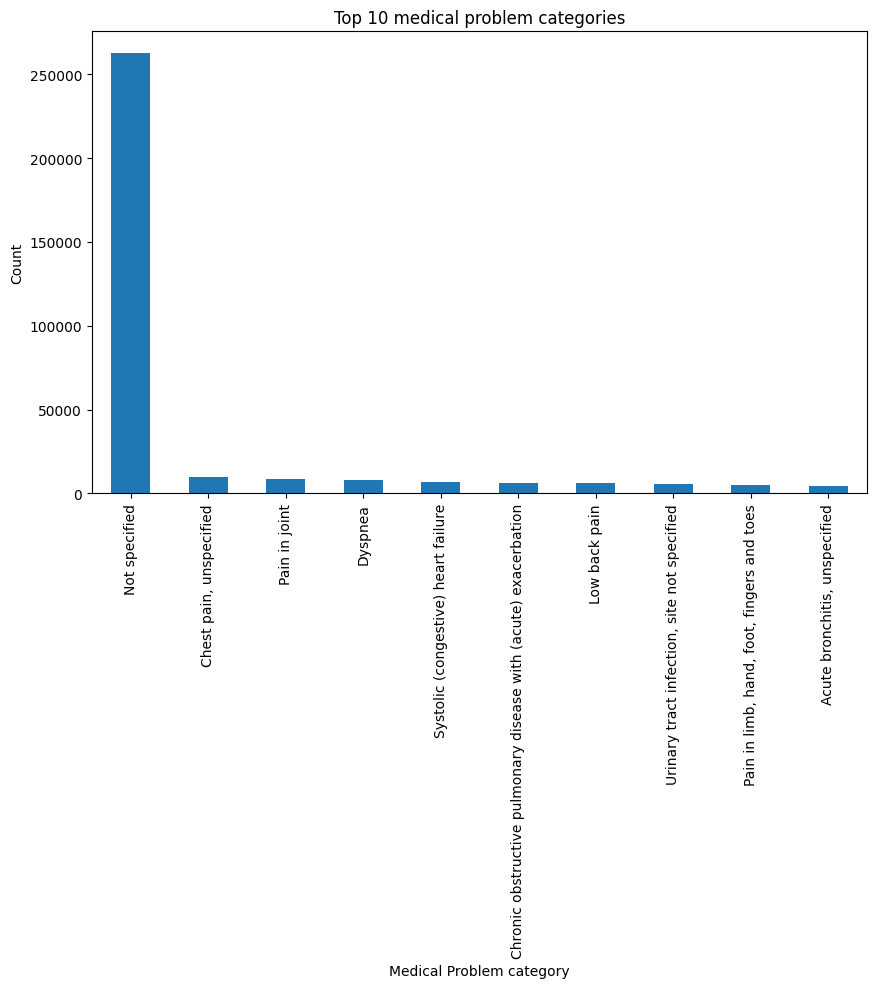

In [16]:
# get the top N most frequenct medical problem categories

top_n = 10
top_categories = ed_visit['First listed diagnosis icd10 subcategory'].value_counts().head(top_n)

#plot the top N medical problem categories

plt.figure(figsize=(10,6))
top_categories.plot(kind = 'bar')
plt.xlabel('Medical Problem category')
plt.ylabel('Count')
plt.title(f'Top {top_n} medical problem categories')
plt.show()

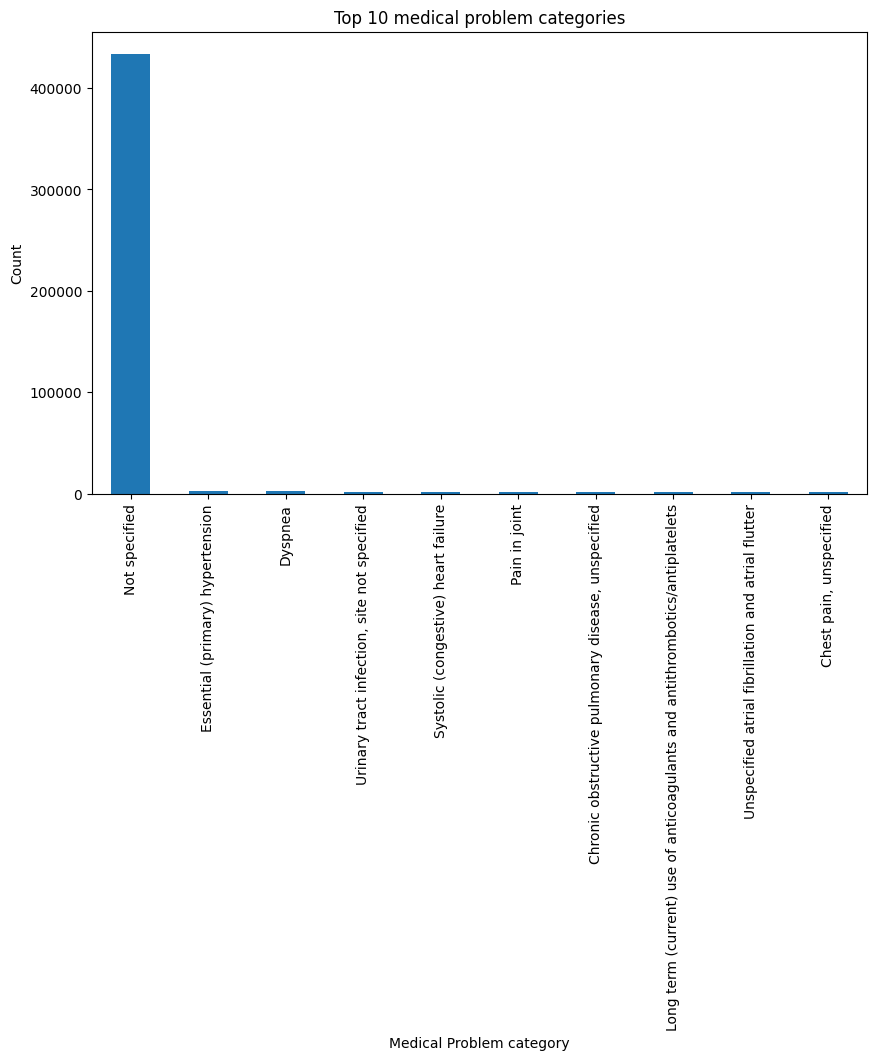

In [17]:
# get the top N most frequenct medical problem categories

top_n = 10
top_categories = ed_visit['Second listed diagnosis icd10 subcategory'].value_counts().head(top_n)

#plot the top N medical problem categories

plt.figure(figsize=(10,6))
top_categories.plot(kind = 'bar')
plt.xlabel('Medical Problem category')
plt.ylabel('Count')
plt.title(f'Top {top_n} medical problem categories')
plt.show()

In [18]:
ed_visit.head()

,Internalpatientid,Age at ed visit,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
0,101689,64.361251,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia
1,107210,71.317300,No,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia
2,107866,61.164579,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania
3,107906,66.101996,No,Dysuria,"Chronic kidney disease, unspecified",New York
4,108522,73.598130,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois


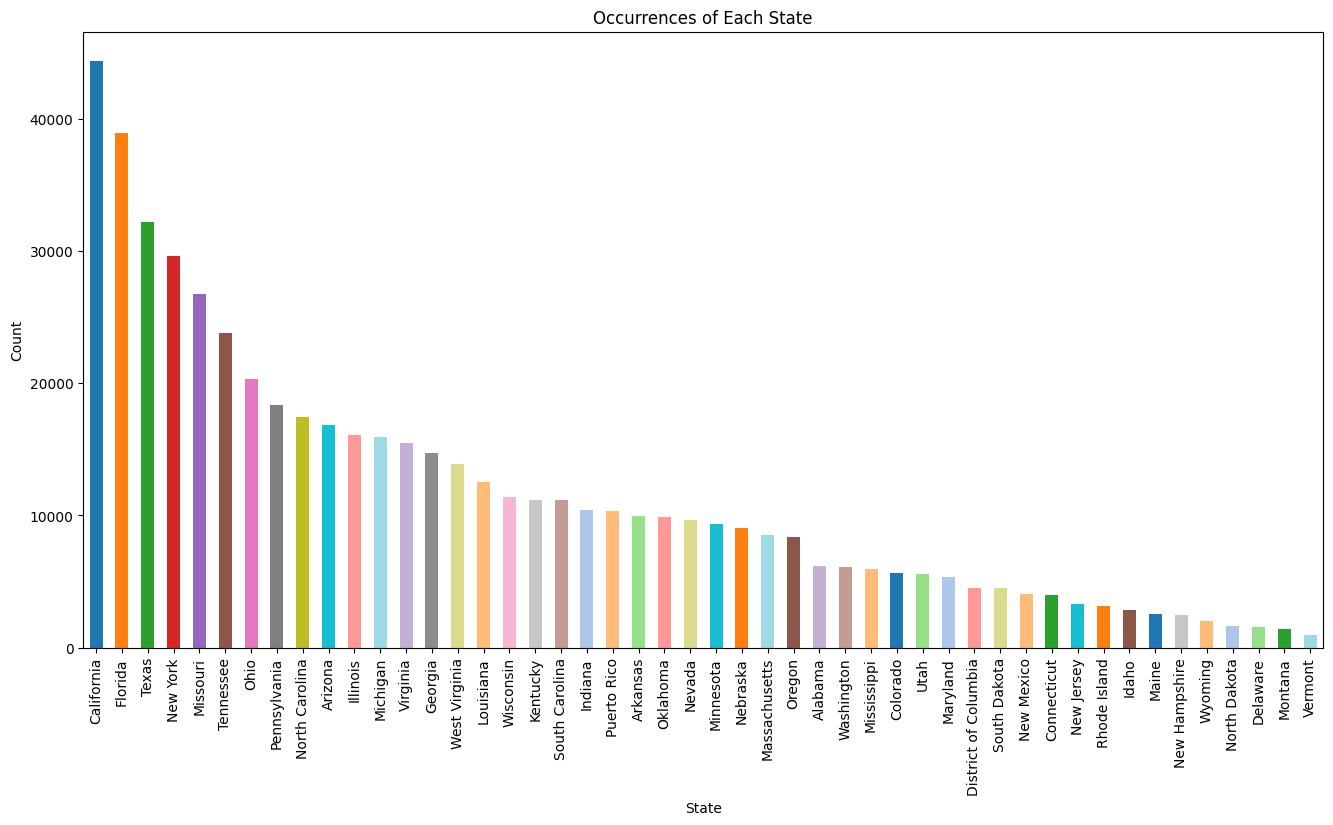

In [19]:
# Count the occurrences of each state
state_counts = ed_visit["State"].value_counts()

# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
                  "#bcbd22", "#17becf", "#ff9896", "#9edae5", "#c5b0d5", "#8c8c8c", "#dbdb8d", "#ffbb78",
                  "#f7b6d2", "#c7c7c7", "#c49c94", "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#dbdb8d",
                  "#17becf", "#ff7f0e", "#9edae5", "#8c564b", "#c5b0d5", "#c49c94", "#ffbb78", "#1f77b4",
                  "#98df8a", "#aec7e8", "#ff9896", "#dbdb8d", "#ffbb78", "#2ca02c", "#17becf", "#ff7f0e",
                  "#8c564b", "#1f77b4", "#c7c7c7", "#ffbb78", "#aec7e8", "#98df8a", "#2ca02c", "#9edae5",
                  "#c49c94", "#c5b0d5", "#dbdb8d", "#ff7f0e", "#17becf", "#8c8c8c", "#ff9896", "#7f7f7f"]

# Bar plot with custom colors
plt.figure(figsize=(16, 8))
state_counts.plot(kind="bar", color=custom_palette)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Occurrences of Each State")
plt.show()

In [20]:
# dropping the "State" and "Died during ed visit" columns not of that use for further analysis
ed_visit.drop(['State','Died during ed visit'], axis = 1, inplace = True)

In [21]:
ed_visit.head()

,Internalpatientid,Age at ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory
0,101689,64.361251,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified"
1,107210,71.317300,"Sepsis, unspecified organism","Hypotension, unspecified"
2,107866,61.164579,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified"
3,107906,66.101996,Dysuria,"Chronic kidney disease, unspecified"
4,108522,73.598130,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...


Bucketing

In [22]:
age_ranges = [(20, 29.9),(30.0, 39.9), (40.0, 49.9), (50.0, 59.9), (60.0, 69.9),(70.0, 79.9), (80.0, 89.9), (90.0, 99.9), (100.0, 109.9)]

# Create the new columns based on age ranges
for range_start, range_end in age_ranges:
    range_label = f'{range_start}-{range_end}_icd10'
    second_range_label = f'{range_start}-{range_end}_second_icd10'
    ed_visit[range_label] = ed_visit.apply(
        lambda row: row['First listed diagnosis icd10 subcategory'] if range_start <= row['Age at ed visit'] <= range_end else None,
        axis=1
    )
    ed_visit[second_range_label] = ed_visit.apply(
        lambda row: row['Second listed diagnosis icd10 subcategory'] if range_start <= row['Age at ed visit'] <= range_end else None,
        axis=1
    )

# Group the DataFrame by 'Internalpatientid' and concatenate the icd10 values
df_grouped =ed_visit.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))
df_grouped

# Reset the index of the grouped DataFrame
df_grouped= df_grouped.reset_index()
df_grouped


<ipython-input-22-c7752341ad48>:17: FutureWarning: ['Age at ed visit'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_grouped =ed_visit.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))


,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,20-29.9_icd10,20-29.9_second_icd10,30.0-39.9_icd10,30.0-39.9_second_icd10,40.0-49.9_icd10,40.0-49.9_second_icd10,50.0-59.9_icd10,...,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,80.0-89.9_icd10,80.0-89.9_second_icd10,90.0-99.9_icd10,90.0-99.9_second_icd10,100.0-109.9_icd10,100.0-109.9_second_icd10
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",,,,,,,,...,"Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",,,,,,
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",,,,,,,"Not specified,Not specified,Not specified,Not ...",...,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",,,,,,,,
2,4,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",,,,,,,,...,,,,,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",,,,
3,8,Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified",,,,,,,Not specified,...,Other symptoms and signs involving cognitive f...,"Not specified,Not specified",,,,,,,,
4,10,"Not specified,Not specified","Not specified,Not specified",,,,,,,,...,"Not specified,Not specified","Not specified,Not specified",,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58235,169050,"Not specified,Not specified","Not specified,Not specified",,,,,,,Not specified,...,Not specified,Not specified,,,,,,,,
58236,169053,"Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...",,,,,,,,...,,,"Not specified,Cellulitis and acute lymphangiti...","Not specified,Not specified,Not specified,Not ...","Dyspnea,Other symptoms and signs involving cog...","Not specified,Not specified,Adult failure to t...",,,,
58237,169057,"Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...",,,,,,,,...,,,"Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...","Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...",,,,
58238,169060,Combined systolic (congestive) and diastolic (...,"Not specified,Not specified,Encounter for othe...",,,,,,,,...,Not specified,Not specified,Combined systolic (congestive) and diastolic (...,"Not specified,Encounter for other general exam...",,,,,,


In [23]:
# Replace blank values with NaN
df_grouped.replace('', np.nan, inplace=True)

# checking the null values(for bucketing data)
missing_values_count = df_grouped.isnull().sum()

# taking the total no.of rows
total_rows = df_grouped.shape[0]

# taking the percetage of missing value
missing_percentage = (missing_values_count / total_rows) * 100
#creating the data frame
missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

missing_data_summary

,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
First listed diagnosis icd10 subcategory,0,0.000000
Second listed diagnosis icd10 subcategory,0,0.000000
20-29.9_icd10,58117,99.788805
20-29.9_second_icd10,58117,99.788805
30.0-39.9_icd10,57682,99.041896
30.0-39.9_second_icd10,57682,99.041896
40.0-49.9_icd10,55896,95.975275
40.0-49.9_second_icd10,55896,95.975275
50.0-59.9_icd10,47961,82.350618


Many columns have more than 90% missing values. so we will drop them.

In [24]:
df_grouped.drop(['20-29.9_icd10','20-29.9_second_icd10','30.0-39.9_icd10','30.0-39.9_second_icd10','40.0-49.9_icd10',
                              '40.0-49.9_second_icd10','50.0-59.9_icd10','50.0-59.9_second_icd10','80.0-89.9_icd10',
                              '80.0-89.9_second_icd10','90.0-99.9_icd10','90.0-99.9_second_icd10','100.0-109.9_icd10',
                              '100.0-109.9_second_icd10'], axis = 1,inplace = True)

In [25]:
df_grouped.head()

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N..."
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN
2,4,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN
3,8,Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified",Other symptoms and signs involving cognitive f...,"Not specified,Not specified",NaN,NaN
4,10,"Not specified,Not specified","Not specified,Not specified","Not specified,Not specified","Not specified,Not specified",NaN,NaN


In [27]:
df_grouped.isnull().sum()

Internalpatientid                                0
First listed diagnosis icd10 subcategory         0
Second listed diagnosis icd10 subcategory        0
60.0-69.9_icd10                              31869
60.0-69.9_second_icd10                       31869
70.0-79.9_icd10                              34324
70.0-79.9_second_icd10                       34324
dtype: int64

In [26]:
# Checking the particular patients id
fl= df_grouped[df_grouped["Internalpatientid"]==1]
fl

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N..."


In [28]:
death_file = pd.read_csv('/content/death_train.csv')
death_file

,Unnamed: 0,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10.0
1,1,100037,75.241135,2008-10-16 15:14:26.0
2,2,100045,85.399403,2019-01-26 11:33:52.0
3,3,100095,84.136551,2004-08-10 21:49:35.0
4,6,10013,68.372126,2007-06-11 00:17:06.0
...,...,...,...,...
97279,123343,99827,87.898767,2003-05-13 23:58:55.0
97280,123344,99842,78.431214,2010-05-25 14:36:27.0
97281,123345,99847,82.115566,2012-02-20 05:44:33.0
97282,123347,99872,92.974602,2010-04-18 05:12:36.0


In [29]:
death_file.drop('Unnamed: 0', axis = 1, inplace = True)
death_file.head()

,Internalpatientid,Age at death,Death date
0,100036,72.412770,2015-01-18 20:49:10.0
1,100037,75.241135,2008-10-16 15:14:26.0
2,100045,85.399403,2019-01-26 11:33:52.0
3,100095,84.136551,2004-08-10 21:49:35.0
4,10013,68.372126,2007-06-11 00:17:06.0


In [30]:
death_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97284 entries, 0 to 97283
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Internalpatientid  97284 non-null  int64  
 1   Age at death       97284 non-null  float64
 2   Death date         97284 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [31]:
death_file['Internalpatientid'].nunique()

97284

Death file have all the unique patient id'

In [32]:
# describe the "age" column
age_description = death_file["Age at death"].describe()


# Accessing the specific statistics
count = age_description['count']
mean = age_description['mean']
min_value = age_description['min']
max_value = age_description['max']

#print specific statistics
print("Count:", count)
print("Mean:", mean)
print("Min value:", min_value)
print("max_value:", max_value)

Count: 97284.0
Mean: 78.3606613225899
Min value: 22.71159624056341
max_value: 110.22737741931398


In [33]:
print("Training set missing values:\n", death_file.isna().sum())

Training set missing values:
 Internalpatientid    0
Age at death         0
Death date           0
dtype: int64


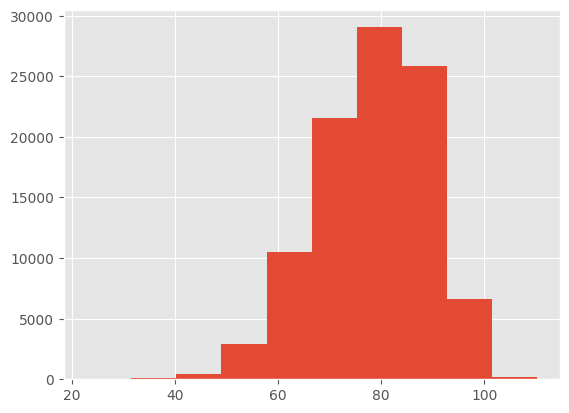

In [34]:
import matplotlib.pyplot as plt
# Histogram for each continuous variable
plt.style.use('ggplot')
plt.hist(death_file["Age at death"], bins=10)
plt.show()

In [35]:
# Creating the new "death"(1) columns
death_file['death']=1
death_file.head()

,Internalpatientid,Age at death,Death date,death
0,100036,72.412770,2015-01-18 20:49:10.0,1
1,100037,75.241135,2008-10-16 15:14:26.0,1
2,100045,85.399403,2019-01-26 11:33:52.0,1
3,100095,84.136551,2004-08-10 21:49:35.0,1
4,10013,68.372126,2007-06-11 00:17:06.0,1


In [36]:

merge_ed_visit_death_left = pd.merge(df_grouped, death_file, how='left',on='Internalpatientid')

In [38]:
merge_ed_visit_death_left

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,Age at death,Death date,death
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",NaN,NaN,NaN
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN,NaN,NaN,NaN
2,4,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN,84.190359,2015-02-24 13:49:53.0,1.0
3,8,Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified",Other symptoms and signs involving cognitive f...,"Not specified,Not specified",NaN,NaN,NaN,NaN,NaN
4,10,"Not specified,Not specified","Not specified,Not specified","Not specified,Not specified","Not specified,Not specified",NaN,NaN,72.384665,2022-08-25 14:16:51.0,1.0
...,...,...,...,...,...,...,...,...,...,...
58235,169050,"Not specified,Not specified","Not specified,Not specified",Not specified,Not specified,NaN,NaN,63.323682,2014-10-19 19:20:04.0,1.0
58236,169053,"Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...",NaN,NaN,"Not specified,Cellulitis and acute lymphangiti...","Not specified,Not specified,Not specified,Not ...",81.349588,2014-02-17 06:35:04.0,1.0
58237,169057,"Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...",NaN,NaN,"Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...",NaN,NaN,NaN
58238,169060,Combined systolic (congestive) and diastolic (...,"Not specified,Not specified,Encounter for othe...",Not specified,Not specified,Combined systolic (congestive) and diastolic (...,"Not specified,Encounter for other general exam...",71.832486,2017-10-15 18:34:11.0,1.0


In [39]:
# when subtract the death - merge_edvisit_death_lef u will get patients who are dead but their are not presented in the edvisit
merge_ed_visit_death_left.shape[0]-death_file.shape[0]

-39044

In [40]:
merge_ed_visit_death_left['death'] = merge_ed_visit_death_left['death'].fillna(0)

In [41]:
merge_ed_visit_death_left.head()

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,Age at death,Death date,death
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",NaN,NaN,0.0
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN,NaN,NaN,0.0
2,4,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN,84.190359,2015-02-24 13:49:53.0,1.0
3,8,Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified",Other symptoms and signs involving cognitive f...,"Not specified,Not specified",NaN,NaN,NaN,NaN,0.0
4,10,"Not specified,Not specified","Not specified,Not specified","Not specified,Not specified","Not specified,Not specified",NaN,NaN,72.384665,2022-08-25 14:16:51.0,1.0


In [42]:
merge_ed_visit_death_left['death'] = merge_ed_visit_death_left['death'].astype(int)
merge_ed_visit_death_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58240 entries, 0 to 58239
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Internalpatientid                          58240 non-null  int64  
 1   First listed diagnosis icd10 subcategory   58240 non-null  object 
 2   Second listed diagnosis icd10 subcategory  58240 non-null  object 
 3   60.0-69.9_icd10                            26371 non-null  object 
 4   60.0-69.9_second_icd10                     26371 non-null  object 
 5   70.0-79.9_icd10                            23916 non-null  object 
 6   70.0-79.9_second_icd10                     23916 non-null  object 
 7   Age at death                               32902 non-null  float64
 8   Death date                                 32902 non-null  object 
 9   death                                      58240 non-null  int64  
dtypes: float64(1), int64(2

In [43]:
merge_ed_visit_death_left['death'].value_counts()

1    32902
0    25338
Name: death, dtype: int64

In [45]:
merge_ed_visit_death_left['death'].value_counts(normalize=True)

1    0.564938
0    0.435062
Name: death, dtype: float64

<Axes: >

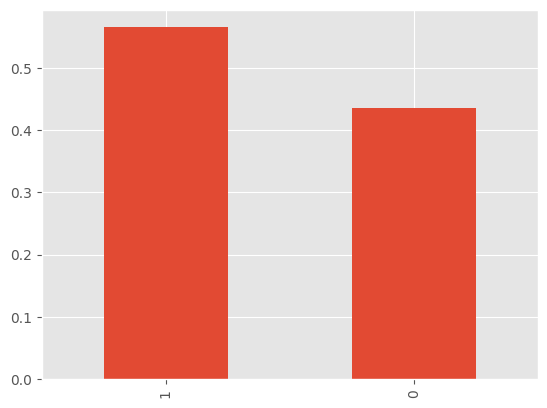

In [46]:
merge_ed_visit_death_left['death'].value_counts(normalize=True).plot(kind='bar')

In [48]:
df_alive = merge_ed_visit_death_left[merge_ed_visit_death_left["death"]==0]
df_alive

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,Age at death,Death date,death
0,1,"Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",NaN,NaN,0
1,2,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN,NaN,NaN,0
3,8,Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified",Other symptoms and signs involving cognitive f...,"Not specified,Not specified",NaN,NaN,NaN,NaN,0
5,11,"Not specified,Pain in joint,Adult failure to t...","Not specified,Not specified,Other specified my...","Not specified,Not specified,Not specified","Not specified,Not specified,Not specified","Pain in joint,Adult failure to thrive","Not specified,Other specified myopathies",NaN,NaN,0
6,13,"Acute respiratory failure,Chest pain, unspecif...","Pneumonia, unspecified organism,Other nonspeci...",NaN,NaN,"Acute respiratory failure,Chest pain, unspecif...","Pneumonia, unspecified organism,Other nonspeci...",NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
58221,169017,Calculus of kidney,Not specified,Calculus of kidney,Not specified,NaN,NaN,NaN,NaN,0
58229,169033,Not specified,Not specified,NaN,NaN,NaN,NaN,NaN,NaN,0
58232,169041,Unspecified atrial fibrillation and atrial flu...,"Not specified,Not specified,Not specified,End ...",NaN,NaN,NaN,NaN,NaN,NaN,0
58234,169047,"Acute upper respiratory infection, unspecified...","Not specified,Not specified,Other foreign body...","Acute upper respiratory infection, unspecified...","Not specified,Not specified,Other foreign body...",NaN,NaN,NaN,NaN,0


25338 are Alive

In [50]:
df_dead = merge_ed_visit_death_left[merge_ed_visit_death_left["death"]==1]

In [52]:
df_dead

,Internalpatientid,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,Age at death,Death date,death
2,4,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN,84.190359,2015-02-24 13:49:53.0,1
4,10,"Not specified,Not specified","Not specified,Not specified","Not specified,Not specified","Not specified,Not specified",NaN,NaN,72.384665,2022-08-25 14:16:51.0,1
7,15,"Respiratory failure, unspecified,Combined syst...",Unspecified atrial fibrillation and atrial flu...,NaN,NaN,NaN,NaN,86.598848,2019-01-16 21:05:39.0,1
8,16,"Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...",NaN,NaN,"Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...",78.894455,2016-01-13 22:09:20.0,1
9,19,"Chest pain, unspecified,Unstable angina,Not sp...","Syncope and collapse,Long term (current) use o...",Not specified,Not specified,"Chest pain, unspecified,Unstable angina","Syncope and collapse,Long term (current) use o...",71.207349,2016-01-20 06:51:50.0,1
...,...,...,...,...,...,...,...,...,...,...
58233,169043,Not specified,Not specified,NaN,NaN,Not specified,Not specified,75.760530,2013-08-11 11:22:06.0,1
58235,169050,"Not specified,Not specified","Not specified,Not specified",Not specified,Not specified,NaN,NaN,63.323682,2014-10-19 19:20:04.0,1
58236,169053,"Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...",NaN,NaN,"Not specified,Cellulitis and acute lymphangiti...","Not specified,Not specified,Not specified,Not ...",81.349588,2014-02-17 06:35:04.0,1
58238,169060,Combined systolic (congestive) and diastolic (...,"Not specified,Not specified,Encounter for othe...",Not specified,Not specified,Combined systolic (congestive) and diastolic (...,"Not specified,Encounter for other general exam...",71.832486,2017-10-15 18:34:11.0,1


In [53]:
# Replace blank values with NaN
df_dead.replace('', np.nan, inplace=True)

# checking the null values
missing_values_count = df_dead.isnull().sum()
# taking the total no.of rows
total_rows = df_dead.shape[0]

# taking the percetage of missing value
missing_percentage = (missing_values_count / total_rows) * 100
#creating the data frame
missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

missing_data_summary

<ipython-input-53-6983ed2a8a60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dead.replace('', np.nan, inplace=True)


,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
First listed diagnosis icd10 subcategory,0,0.000000
Second listed diagnosis icd10 subcategory,0,0.000000
60.0-69.9_icd10,20918,63.576682
60.0-69.9_second_icd10,20918,63.576682
70.0-79.9_icd10,20458,62.178591
70.0-79.9_second_icd10,20458,62.178591
Age at death,0,0.000000
Death date,0,0.000000
death,0,0.000000
